In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [4]:
#Load the data set
Titanic = pd.read_csv("C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\Logistic Regression\\Titanic_test.csv")
Titanic = pd.read_csv("C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\Logistic Regression\\Titanic_train.csv")

In [5]:
# Display the first few rows of the dataset
Titanic.head()

# Get information about the features (data types, non-null values)
Titanic.info()

# Generate descriptive statistics (mean, standard deviation, etc.)
Titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


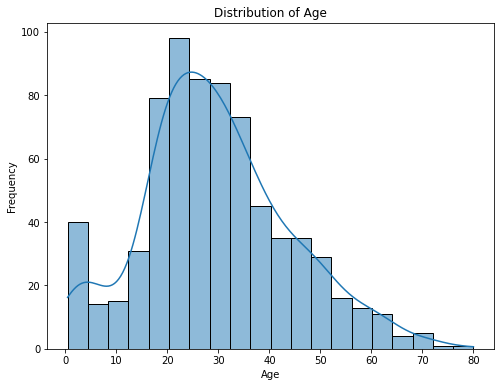

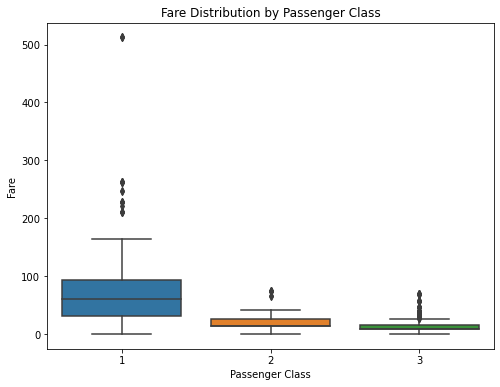

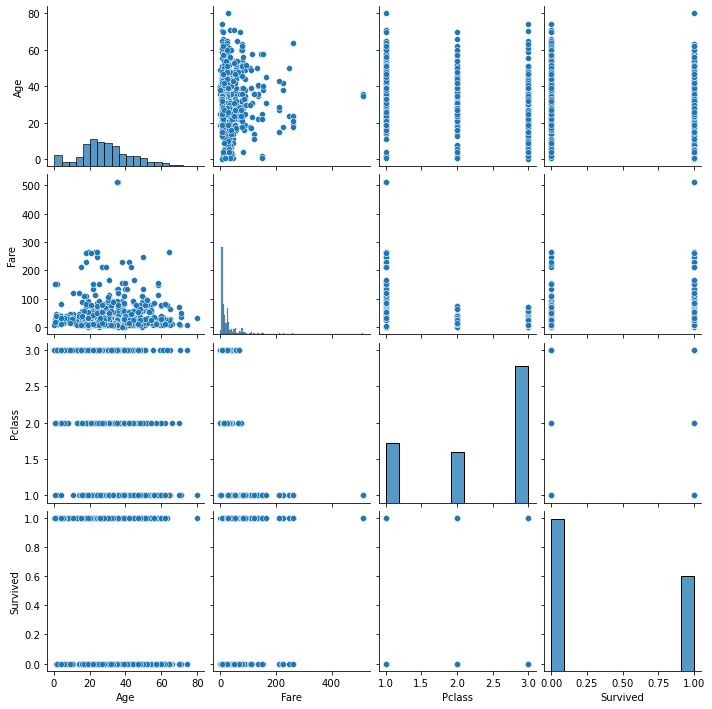

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(Titanic['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of Fare by Passenger Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=Titanic)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Pair plot for selected features
sns.pairplot(Titanic[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()

In [7]:
Titanic['Age'].fillna(Titanic['Age'].mean(), inplace=True)

In [8]:
Titanic = pd.get_dummies(Titanic, columns=['Sex', 'Embarked'], drop_first=True)

In [9]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression object
model = LogisticRegression()

In [10]:
# Define features (X) and target (y)
X = Titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]  # Select relevant features
y = Titanic['Survived']

# Split data into training and testing sets (if needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Train the model
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC score: {roc_auc:.4f}")

Accuracy: 0.7989
Precision: 0.7714
Recall: 0.7297
F1-score: 0.7500
ROC-AUC score: 0.7887


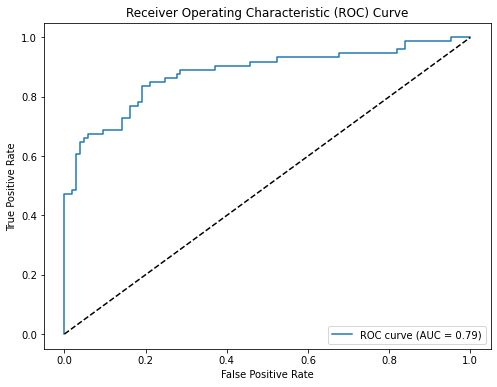

In [12]:
import matplotlib.pyplot as plt

# Get probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
# Get the coefficients
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients
print(coefficients_df)

      Feature  Coefficient
0      Pclass    -0.881695
1         Age    -0.025867
2       SibSp    -0.284321
3       Parch    -0.079075
4        Fare     0.003247
5    Sex_male    -2.523490
6  Embarked_Q     0.106978
7  Embarked_S    -0.301995
